# UNIVERSITY ELIGIBILY ADMIT PREDICTOR

## 1. Importing Libraries

In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle

## 2. Loading the datasets

In [357]:
df1 = pd.read_csv("round_1.csv")
df2 = pd.read_csv("round_2.csv")
df3 = pd.read_csv("round_3.csv")
df4 = pd.read_csv("round_4.csv")

## 3. Adding the 'round' column

In [358]:
df1['ROUND'] = 1
df2['ROUND'] = 2
df3['ROUND'] = 3
df4['ROUND'] = 4

In [359]:
df1.head()

,S NO,APPLICATION NUMBER,NAME OF THE CANDIDATE,AGGREGATE MARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY,ROUND
0,1,316999,J NITHYASREE,200.0,1,MBCV,1,CS,OC,1
1,2,251701,SREENITHI A,200.0,3,BC,1,CS,OC,1
2,3,340928,UMA SHWETHA P L,200.0,6,OC,1,EC,OC,1
3,4,258426,SUBHASRI SHREYA S L,200.0,7,BC,2006,CM,OC,1
4,5,243792,Sarathivasan s,200.0,8,BC,1,CS,OC,1


In [360]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10118 entries, 0 to 10117
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S NO                   10118 non-null  int64  
 1   APPLICATION NUMBER     10118 non-null  int64  
 2   NAME OF THE CANDIDATE  10118 non-null  object 
 3   AGGREGATE MARK         10118 non-null  float64
 4   RANK                   10118 non-null  int64  
 5   COMMUNITY              10118 non-null  object 
 6   COLLEGE CODE           10118 non-null  int64  
 7   BRANCH CODE            10118 non-null  object 
 8   ALLOTTED CATEGORY      10118 non-null  object 
 9   ROUND                  10118 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 790.6+ KB


In [361]:
df2.head()

,S NO,APPLICATION NUMBER,NAME OF THE CANDIDATE,AGGREGATE MARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY,ROUND
0,1,339809,Derin Patrick J,199.500,15,BC,1149,AD,OC,2
1,2,317367,M NIKKETHA,197.000,436,SC,2,CL,SC,2
2,3,292209,shyamalan senthil,195.500,1013,BC,1324,CS,OC,2
3,4,241046,SANTHIYA E,195.350,1087,BC,3011,IT,OC,2
4,5,309601,SHAJI S,195.185,1150,OC,1026,CS,OC,2


In [362]:
df3.head()

,S NO,APPLICATION NUMBER,NAME OF THE CANDIDATE,AGGREGATE MARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY,ROUND
0,1,312150,CHANDINI D,193.900,2122,BC,2751,IT,BC,3
1,2,215831,KANIHA.K,193.185,2612,BC,4024,EC,BC,3
2,3,351148,ABDULLAH THOAHA YASEEN Y,192.500,3516,BCM,1422,EC,BCM,3
3,4,299636,SANGEETHA R,192.110,3814,BC,4678,EC,BC,3
4,5,240841,JANAGAN A,190.395,6493,MBCV,2708,CS,MBCV,3


In [363]:
df4.head()

,S NO,APPLICATION NUMBER,NAME OF THE CANDIDATE,AGGREGATE MARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY,ROUND
0,1,209679,HARISH K,188.91,9322,MBCV,1520,CS,MBCV,4
1,2,212066,SANJIV KANNAA J,188.50,10002,SC,1140,CS,SC,4
2,3,351955,A LINIYA DHAYALINI,186.50,13624,BC,1427,EC,OC,4
3,4,370640,KALAIVANAN K,185.50,15679,BC,1325,ME,OC,4
4,5,359595,ARAVIND I,185.32,16123,MBCV,1412,CS,MBCV,4


## 4. Merging 4 dataframes into 1

In [364]:
df = pd.concat([df1, df2, df3, df4],ignore_index =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S NO                   80068 non-null  int64  
 1   APPLICATION NUMBER     80068 non-null  int64  
 2   NAME OF THE CANDIDATE  80068 non-null  object 
 3   AGGREGATE MARK         80068 non-null  float64
 4   RANK                   80068 non-null  int64  
 5   COMMUNITY              80068 non-null  object 
 6   COLLEGE CODE           80068 non-null  int64  
 7   BRANCH CODE            80068 non-null  object 
 8   ALLOTTED CATEGORY      80068 non-null  object 
 9   ROUND                  80068 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 6.1+ MB


## 5. Dropping unnecessary columns

In [365]:
df = df.drop(["S NO","APPLICATION NUMBER","NAME OF THE CANDIDATE"] , axis=1)
df.head()

,AGGREGATE MARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY,ROUND
0,200.0,1,MBCV,1,CS,OC,1
1,200.0,3,BC,1,CS,OC,1
2,200.0,6,OC,1,EC,OC,1
3,200.0,7,BC,2006,CM,OC,1
4,200.0,8,BC,1,CS,OC,1


## 6. Renaming Column Names

In [366]:
df.rename(columns = {'AGGREGATE MARK':'AGGREGATE_MARK','COLLEGE CODE':'COLLEGE_CODE','BRANCH CODE':'BRANCH_CODE','ALLOTTED CATEGORY':'ALLOTTED_CATEGORY'}, inplace = True)

## 7. Checking for Null Values

In [367]:
df.isnull().sum()

AGGREGATE_MARK       0
RANK                 0
COMMUNITY            0
COLLEGE_CODE         0
BRANCH_CODE          0
ALLOTTED_CATEGORY    0
ROUND                0
dtype: int64

In [368]:
df['COLLEGE_CODE']= df['COLLEGE_CODE'].apply(str)
df.head()

,AGGREGATE_MARK,RANK,COMMUNITY,COLLEGE_CODE,BRANCH_CODE,ALLOTTED_CATEGORY,ROUND
0,200.0,1,MBCV,1,CS,OC,1
1,200.0,3,BC,1,CS,OC,1
2,200.0,6,OC,1,EC,OC,1
3,200.0,7,BC,2006,CM,OC,1
4,200.0,8,BC,1,CS,OC,1


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGGREGATE_MARK     80068 non-null  float64
 1   RANK               80068 non-null  int64  
 2   COMMUNITY          80068 non-null  object 
 3   COLLEGE_CODE       80068 non-null  object 
 4   BRANCH_CODE        80068 non-null  object 
 5   ALLOTTED_CATEGORY  80068 non-null  object 
 6   ROUND              80068 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.3+ MB


## 8. Uni-Variate Visualization

### Histogram

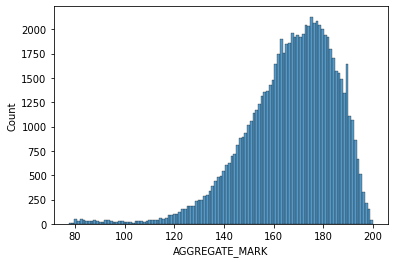

In [370]:
sns.histplot(df['AGGREGATE_MARK'])
plt.show()

## 9. Bi-Variate Visualization

### Scatter Plot

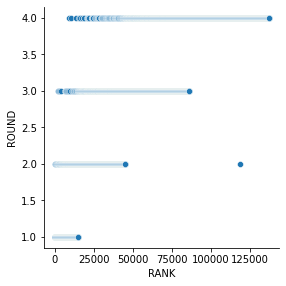

In [371]:
sns.pairplot(df, x_vars='RANK', y_vars='ROUND', height=4, aspect=1, kind='scatter')

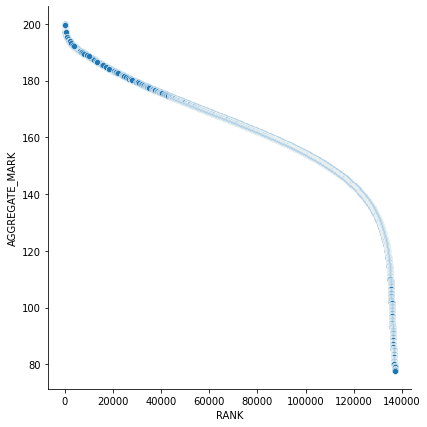

In [372]:
sns.pairplot(df, x_vars='RANK', y_vars='AGGREGATE_MARK', height=6, aspect=1, kind='scatter')

## 10. Multi-Variate visualization

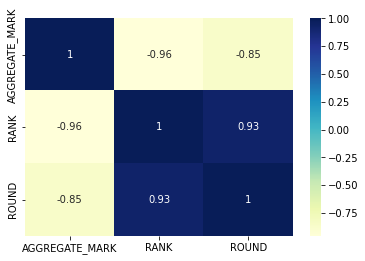

In [373]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

## 11. Shuffling of rows

In [374]:
df = df.sample(frac = 1)
df.head()

,AGGREGATE_MARK,RANK,COMMUNITY,COLLEGE_CODE,BRANCH_CODE,ALLOTTED_CATEGORY,ROUND
31150,175.725,40218,BC,1516,ME,OC,3
22736,178.330,33003,BC,2718,CE,BC,2
18751,180.625,26996,MBC,4917,CS,OC,2
54404,166.330,67893,SC,5990,EC,OC,4
29052,174.755,42959,BC,2749,CS,OC,2


## 12. **Predicting RANK from AGGREGATE_MARK**

In [375]:
X = df['AGGREGATE_MARK']
y = df['RANK']

In [376]:
X = np.array(X)
y = np.array(y)

In [377]:
from sklearn.metrics import confusion_matrix

### Spliting dependent and independent variables

In [378]:
X = df['AGGREGATE_MARK']
y = df['RANK']

### Confusion Matrix

In [379]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

### Accuracy

In [380]:
clf_p = clf.fit(X_train, y_train)
clf_p.score(X_test,y_test)

0.7700534759358288

###  Precision

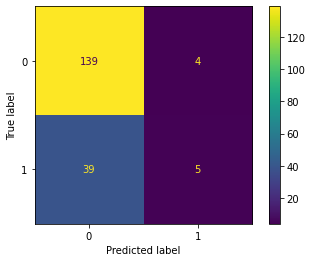

In [381]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()


### Recall

In [382]:
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average='macro')
Recall

0.5428321678321678

### F1 score

In [383]:
from sklearn.metrics import f1_score

In [384]:
F1_Score = 2 * (cm * Recall) / (cm + Recall)
F1_Score

array([[1.08144102, 0.95593612],
       [1.07076066, 0.9793408 ]])

### ROC Curve (Receiver Operating Characteristics)


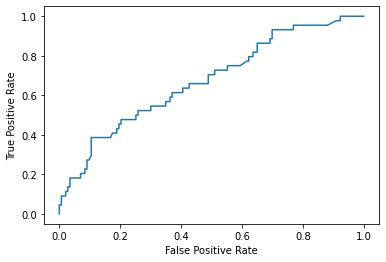

In [385]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Precision Recall 

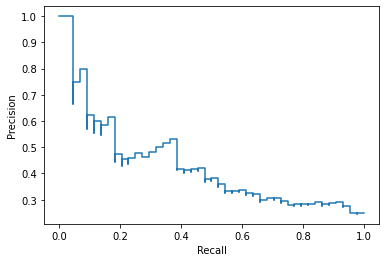

In [386]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### Precision Recall vs ROC curve

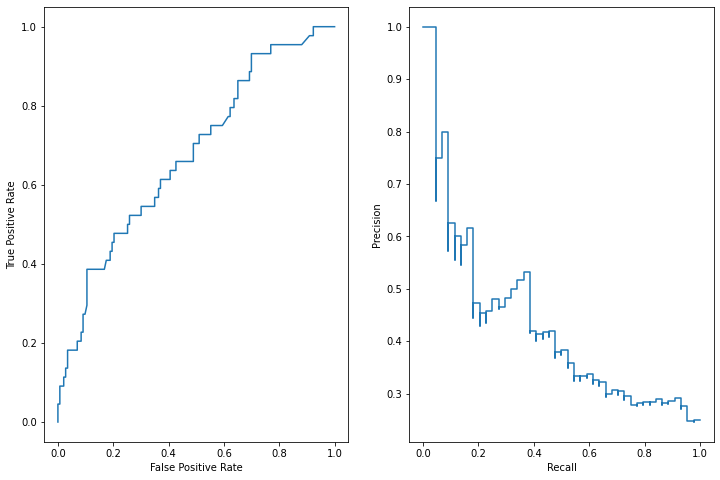

In [387]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [395]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [396]:
X = df['AGGREGATE_MARK']
y = df['RANK']

In [397]:
X_train
X_train=X_train.to_numpy()
X_train = X_train.reshape(-1, 1)

In [398]:
y_train
y_train=y_train.to_numpy()
y_train = y_train.reshape(-1, 1)

In [399]:
y_test
y_test =y_test.to_numpy()
y_test = y_test.reshape(-1, 1)

In [400]:
X_test
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1, 1)

### Model Building using LINEAR REGRESSION

In [401]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Model Building with 100% data

In [402]:
m2r = LinearRegression()
m2r.fit(X.to_numpy().reshape(-1,1), y.to_numpy().reshape(-1,1)) 

LinearRegression()

### Testing the model

In [403]:
pred_test =lr.predict([[167.40]])
pred_test

array([[61061.84904001]])

In [404]:
var = round(float(pred_test[0][0]))
var

61062

In [405]:
type(var)

int

### Finding accuracy

In [406]:
lr.score(X_test,y_test)

0.9118663449570079

In [407]:
m2r.score(X_test, y_test)

0.91193779946438

### Exporting the model to pickle file

In [408]:
with open('./marks_to_rank.pickle','wb') as f:
    pickle.dump(m2r,f)

## **13. PREDICTING ROUND from RANK**

### Spliting dependent and independent variables

In [409]:
X1 = df['RANK']
y1= df['ROUND']

### Confusion Matrix

In [410]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

### Accuracy

In [411]:
clf_p = clf.fit(X_train, y_train)
clf_p.score(X_test,y_test)

0.7754010695187166

### Precision

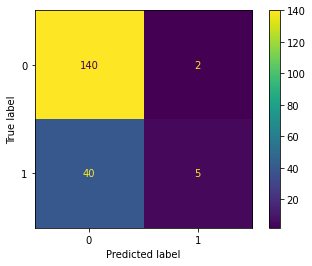

In [412]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()


### Recall

In [413]:
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average='macro')
Recall

0.5485133020344288

### F1 score

In [414]:
from sklearn.metrics import f1_score
F1_Score = 2 * (cm * Recall) / (cm + Recall)
F1_Score

array([[1.09274528, 0.86091495],
       [1.08218676, 0.98857707]])

### ROC Curve (Receiver Operating Characteristics)


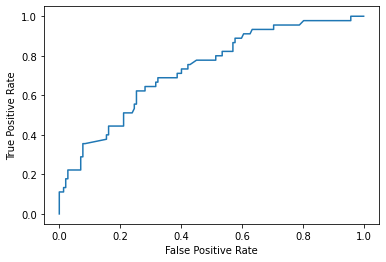

In [415]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Precision Recall

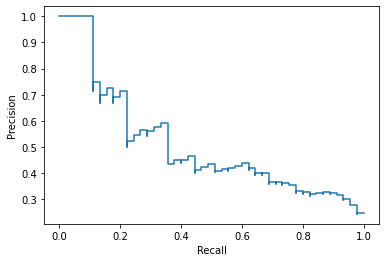

In [416]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### Precision Recall vs ROC curve

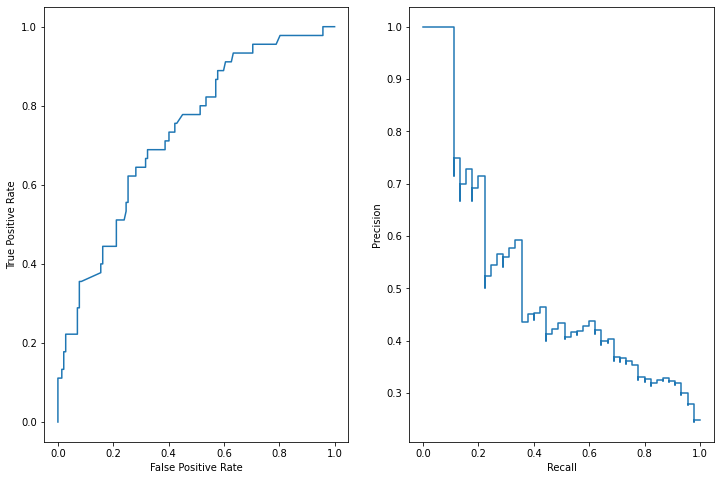

In [417]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [418]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.9, test_size = 0.1, random_state = 0)

In [419]:
X1_train
X1_train=X1_train.to_numpy()
X1_train = X1_train.reshape(-1, 1)

In [420]:
y1_train
y1_train=y1_train.to_numpy()
y1_train = y1_train.reshape(-1, 1)

In [421]:
X1_test
X1_test=X1_test.to_numpy()
X1_test = X1_test.reshape(-1, 1)

In [422]:
y1_test
y1_test=y1_test.to_numpy()
y1_test = y1_test.reshape(-1, 1)

### Model Building

In [423]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X1_train,y1_train)

LinearRegression()

### Model Building using 100% data

In [424]:
r2r = LinearRegression()
r2r.fit(X1.to_numpy().reshape(-1,1), y1.to_numpy().reshape(-1,1))

LinearRegression()

### Finding the Accuracy

In [425]:
lr.score(X1_test,y1_test)

0.8629289074958698

In [426]:
r2r.score(X1_test, y1_test)

0.8629322177155008

### Testing the ROUND

In [427]:
pred_test =lr.predict([[58648]])
if (pred_test < 1):
  pred_test = 1
elif pred_test > 4:
  pred_test = 4
else:
  pred_test = pred_test.round()

pred_test

array([[3.]])

In [428]:
type(int(pred_test[0][0]))

int

In [429]:
var = np.int_(pred_test[0][0].astype(int))
var

3

In [430]:
type(int(var))

int

### Exporting model to pickle file

In [431]:
with open('./rank_to_round.pickle','wb') as f:
    pickle.dump(r2r,f)